# **- Pipeline crack detection -**

# **pipe_segmentation_train V1**

This model is able to detect pipes on an image and generate a mask.

This version has ben trainned just with good pipes. After some test is possible to ensure that it will work for cracked pipes.



# **0. Libraries**

### Installing libraries

In [ ]:
print("Installing segmentation_models....")
!pip install segmentation_models --quiet
print("  -> segmentation_models installed!")

print("\n" + '\033[1m' + "Libraries correctly installed!" + '\033[0m')

Installing segmentation_models....
  -> segmentation_models installed!

Libraries correctly installed!


### Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
from datetime import datetime
import random

import matplotlib.pyplot as plt
import numpy as np

%env SM_FRAMEWORK = tf.keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split

# from keras.preprocessing.image import ImageDataGenerator

# from patchify import patchify, unpatchify
# import tifffile as tiff

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


# **1. Auxiliar functions**

In [ ]:
class printing_format:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

format = printing_format()

# **2. DataSet generation**

### 2.1. Import images

In [ ]:
# Image save
class img_storage:
  def __init__ (self, good_img, pipe_roi):
    self.pipe_img = pipe_img
    self.pipe_roi = pipe_roi

# Stablish path
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_size = 256

# Good images
path = "pipe_img"

files = os.listdir( path )
files = sorted( files )

pipe_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  pipe_img.append( img )

# Pipe area
path = "pipe_roi"

files = os.listdir( path )
files = sorted(files)

pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  pipe_roi.append( img )

# Generate arrays
pipe_img = np.array(pipe_img)
pipe_roi= np.array(pipe_roi)

# Storage images
saved = img_storage(pipe_img, pipe_roi)

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet



		-- IMAGES --
  Pipe images:  	(199, 256, 256)
  Pipe ROI:     	(199, 256, 256)

Index: 90


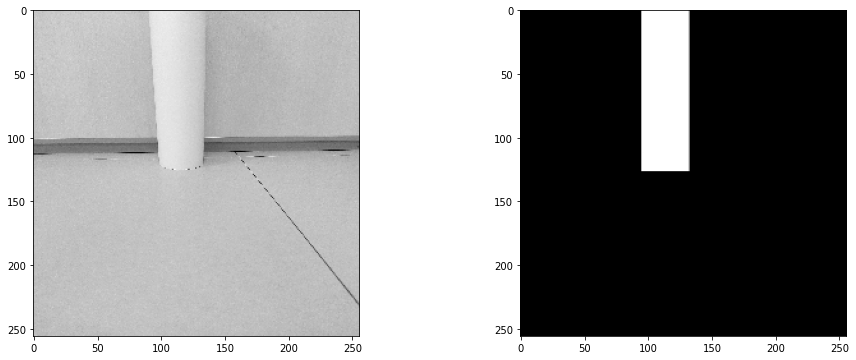

Index: 77


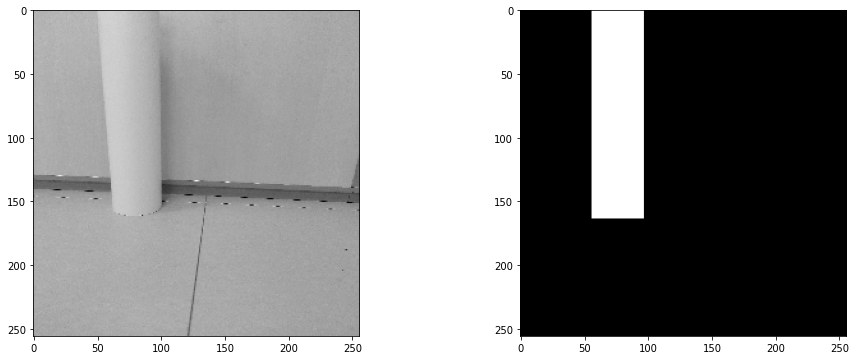

In [ ]:
# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Pipe images:  \t" + str( saved.pipe_img.shape ) )
print("  Pipe ROI:     \t" + str( saved.pipe_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

### 2.2. Normalize values

In [ ]:
pipe_img  = saved.pipe_img
pipe_roi  = saved.pipe_roi

print(format.bold + "Splited data:" + format.end)
print("  Pipe images:  \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:     \t" + str( pipe_roi.shape ) + "\t - " + str( pipe_roi.dtype ) )
print()

index = random.randint(0, len(pipe_img) - 1)

print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:  \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:     \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print()

for i in range( pipe_img.shape[0] ):
  pipe_img[index] = pipe_img[index] - pipe_img[index].min()
  pipe_img[index] = pipe_img[index] / pipe_img[index].max()

pipe_roi = pipe_roi > 20

data_type = "float32"
pipe_img = pipe_img.astype( data_type )
pipe_roi = pipe_roi.astype( data_type )

print(format.bold + "Splited data:" + format.end)
print("  Pipe images:  \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:     \t" + str( pipe_roi.shape ) + "\t - " + str( pipe_roi.dtype ) )
print()

print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:  \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:     \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )

Splited data:
  Pipe images:  	(199, 256, 256)	 - uint8
  Pipe ROI:     	(199, 256, 256)	 - uint8

Max-Min (99):
  Pipe images:  	38	-	202
  Pipe ROI:     	0	-	255

Splited data:
  Pipe images:  	(199, 256, 256)	 - float32
  Pipe ROI:     	(199, 256, 256)	 - float32

Max-Min (99):
  Pipe images:  	0.0	-	1.0
  Pipe ROI:     	0.0	-	1.0


Index: 88


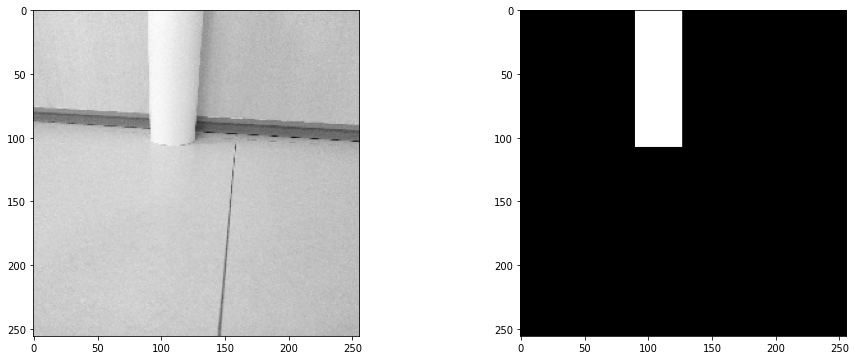

Index: 11


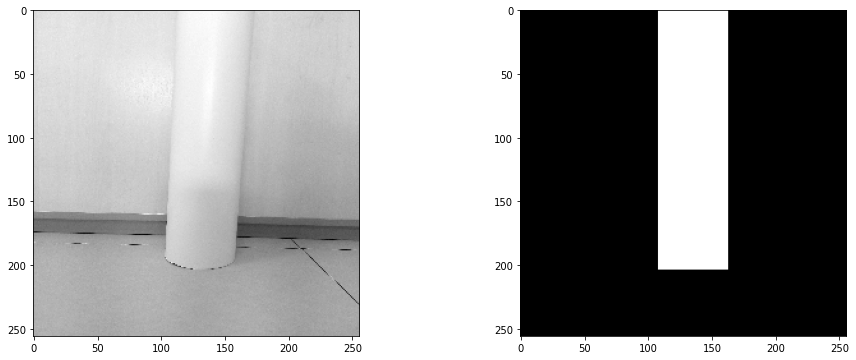

In [ ]:
for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

### 2.3. Clone layers

In [ ]:
x = np.zeros( (pipe_img.shape[0], pipe_img.shape[1], pipe_img.shape[2], 3), dtype = data_type )

x[:, :, :, 0] = pipe_img[:, :, :]
x[:, :, :, 1] = pipe_img[:, :, :]
x[:, :, :, 2] = pipe_img[:, :, :]

pipe_img = x

print(format.bold + "Pipe images: " + format.end + str( pipe_img.shape ))

Pipe images: (199, 256, 256, 3)


### 2.4. Split data

In [ ]:
test_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(pipe_img, pipe_roi, test_size = test_size, random_state = 0)

print(format.bold + "Splited data:" + format.end)
print("  x_train: \t" + str( x_train.shape ) + "\t - " + str( x_train.dtype ) )
print("  y_train: \t" + str( y_train.shape ) + "\t\t - " + str( y_train.dtype ) )
print("  x_test:  \t" + str( x_test.shape ) + "\t - " + str( x_test.dtype ) )
print("  y_test:  \t" + str( y_test.shape ) + "\t\t - " + str( y_test.dtype ) )

Splited data:
  x_train: 	(179, 256, 256, 3)	 - float32
  y_train: 	(179, 256, 256)		 - float32
  x_test:  	(20, 256, 256, 3)	 - float32
  y_test:  	(20, 256, 256)		 - float32


# **3. Define UNET model**

### 3.1. Trainning the model

In [ ]:
# Paremeters

backbones = ["resnet34", "resnet50"]
BACKBONE = backbones[1]

encoder = 'imagenet'

epoch = 100
batch_size = 4
steps = False

In [ ]:
if steps != False:
  batch_size = int(x_train.shape[0] / steps)
else:
  step = int(x_train.shape[0] / batch_size)

t0 = datetime.now()
t0 = datetime.strftime(t0, "%Y/%m/%d - %H:%M:%S")

print(format.bold + "===============================================" + format.end)
print(format.bold + "\t\t- MODEL SUMMARY -" + format.end)
print(format.bold + "===============================================" + format.end)
print(format.bold + "Start time:       \t" + format.end + str(t0) )
print(format.bold + "Train size:       \t" + format.end + str(x_train.shape[0]))
print(format.bold + "Image size:       \t" + format.end + str(x_train.shape[1]) + "x" + str(x_train.shape[2]) )
print(format.bold + "===============================================" + format.end)
print(format.bold + "Backbone:         \t" + format.end + str(BACKBONE))
print(format.bold + "Encoder_weights:  \t" + format.end + str(encoder))
print(format.bold + "Epochs:           \t" + format.end + str(epoch))
print(format.bold + "Steps per epoch:  \t" + format.end + str(step))
print(format.bold + "Batch size:       \t" + format.end + str(batch_size))
print(format.bold + "===============================================" + format.end)

		- MODEL SUMMARY -
Start time:       	2022/06/01 - 06:10:57
Train size:       	179
Image size:       	256x256
Backbone:         	resnet50
Encoder_weights:  	imagenet
Epochs:           	100
Steps per epoch:  	44
Batch size:       	4


In [ ]:
preprocess_input1 = sm.get_preprocessing(BACKBONE)

model = sm.Unet(BACKBONE, encoder_weights = encoder)

model.compile('Adam', loss = sm.losses.bce_jaccard_loss, metrics = [sm.metrics.iou_score])

# print( model.summary() )

if steps != False:
  history = model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = epoch, steps_per_epoch = steps)
else:
  history = model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = epoch, batch_size = batch_size)

Epoch 1/100
45/45 [==============================] - 362s 8s/step - loss: 0.5543 - iou_score: 0.5936 - val_loss: 10.7019 - val_iou_score: 0.1694
Epoch 2/100
45/45 [==============================] - 362s 8s/step - loss: 0.2755 - iou_score: 0.8174 - val_loss: 7.0250 - val_iou_score: 0.1812
Epoch 3/100
45/45 [==============================] - 354s 8s/step - loss: 0.2363 - iou_score: 0.8468 - val_loss: 2.8158 - val_iou_score: 0.2913
Epoch 4/100
45/45 [==============================] - 356s 8s/step - loss: 0.2007 - iou_score: 0.8738 - val_loss: 0.7361 - val_iou_score: 0.5657
Epoch 5/100
45/45 [==============================] - 355s 8s/step - loss: 0.1929 - iou_score: 0.8819 - val_loss: 0.4457 - val_iou_score: 0.7875
Epoch 6/100
45/45 [==============================] - 356s 8s/step - loss: 0.1867 - iou_score: 0.8839 - val_loss: 0.2558 - val_iou_score: 0.8498
Epoch 7/100
45/45 [==============================] - 356s 8s/step - loss: 0.1900 - iou_score: 0.8835 - val_loss: 0.2557 - val_iou_score

In [ ]:
tf = datetime.now()
tf = datetime.strftime(tf, "%Y/%m/%d - %H:%M:%S")
print(format.bold + "End time:       \t" + format.end + str(tf) )

End time:       	2022/06/01 - 16:16:30


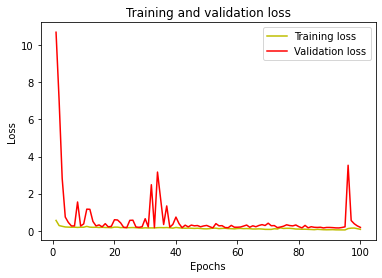

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

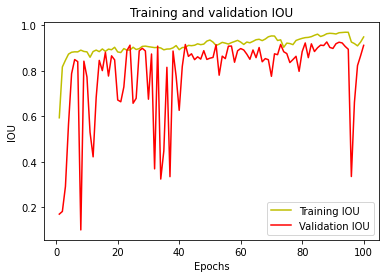

In [ ]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
# Save model results

%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/model_data'

model_name = datetime.now()
model_name = datetime.strftime(model_name, "%Y-%m-%d_%H-%M-%S")
model_name = str( model_name ) + "_unet_model"

print(format.bold + "UNET file: \t" + format.end + model_name)

model.save( model_name )

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/model_data
UNET file: 	2022-06-01_16-16-30_unet_model
INFO:tensorflow:Assets written to: 2022-06-01_16-16-30_unet_model/assets


### 3.2. Check results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images format:
  Image:   	 (20, 256, 256, 3)	 - float32
  ROI:     	 (20, 256, 256)		 - float32
  Predict: 	 (20, 256, 256)		 - float32

0. Index:  19


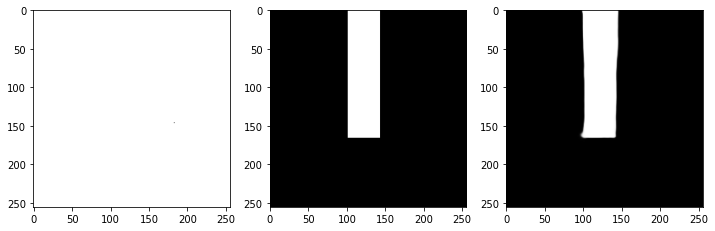

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1. Index:  15


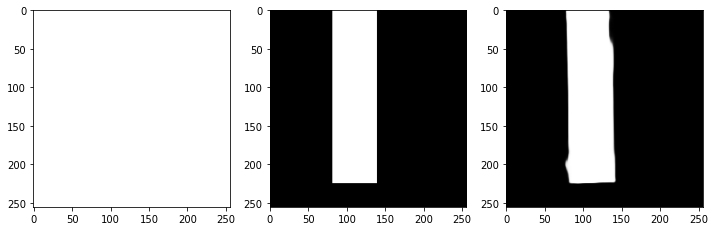

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2. Index:  15


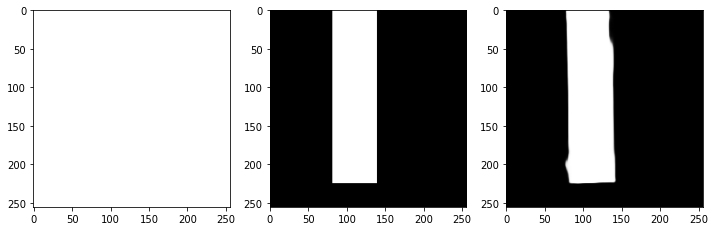

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3. Index:  18


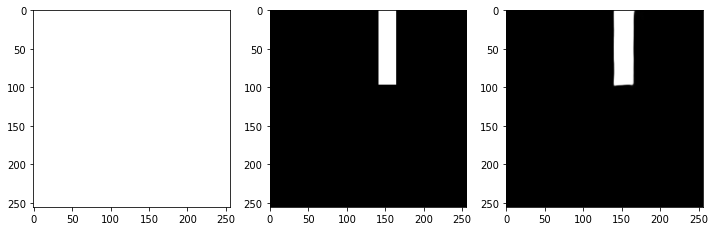

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4. Index:  8


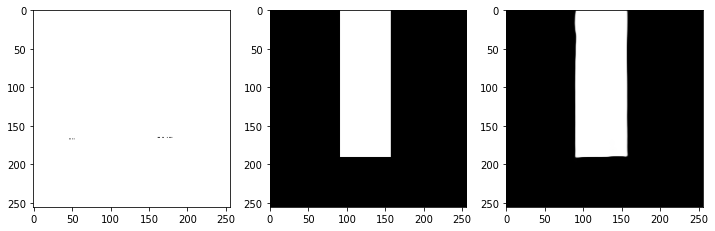

In [ ]:
prediction = model.predict( x_test )
prediction = prediction[:, :, :, 0]

print(format.bold + "Images format:" + format.end)
print("  Image:   \t " + str(x_test.shape) + "\t - " + str( x_test.dtype ) )
print("  ROI:     \t " + str(y_test.shape) + "\t\t - " + str( y_test.dtype ) )
print("  Predict: \t " + str(prediction.shape) + "\t\t - " + str( y_test.dtype ) )
print()

for i in range(5):

  index = random.randint(0, len(x_test) - 1)

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.imshow( x_test[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( y_test[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( prediction[index], cmap = "gray" )
  plt.show()